# 🛡️ Intrusion Detection System (IDS) using Machine Learning & Deep Learning

This project leverages the **KDD Cup 1999** dataset to build a hybrid Intrusion Detection System using both classical and deep learning models.

## 📌 Key Highlights:
- Dataset: [KDD Cup 1999 - 10% Version](https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)
- Preprocessing: Label Encoding, Standardization
- Dimensionality Reduction: PCA
- Models: Random Forest Classifier & Deep Neural Network (TensorFlow)
- Evaluation Metrics: Accuracy, Confusion Matrix, Classification Report

> This project aims to simulate a real-time IDS solution for detecting network intrusions in cybersecurity systems.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import urllib.request
import gzip
import shutil


In [25]:

url = 'https://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
local_filename = 'kddcup.data_10_percent.gz'


urllib.request.urlretrieve(url, local_filename)


with gzip.open(local_filename, 'rb') as f_in:
    with open('kddcup.data_10_percent.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset downloaded and extracted successfully.")


Dataset downloaded and extracted successfully.


In [26]:


column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]


df = pd.read_csv('kddcup.data_10_percent.csv', names=column_names)
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [27]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [28]:
print(df.isnull().sum())


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [29]:
df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [30]:

df_encoded = df.copy()
categorical_cols = ['protocol_type', 'service', 'flag']


label_encoder = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])


In [31]:

X = df_encoded.drop('label', axis=1)
y = df_encoded['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


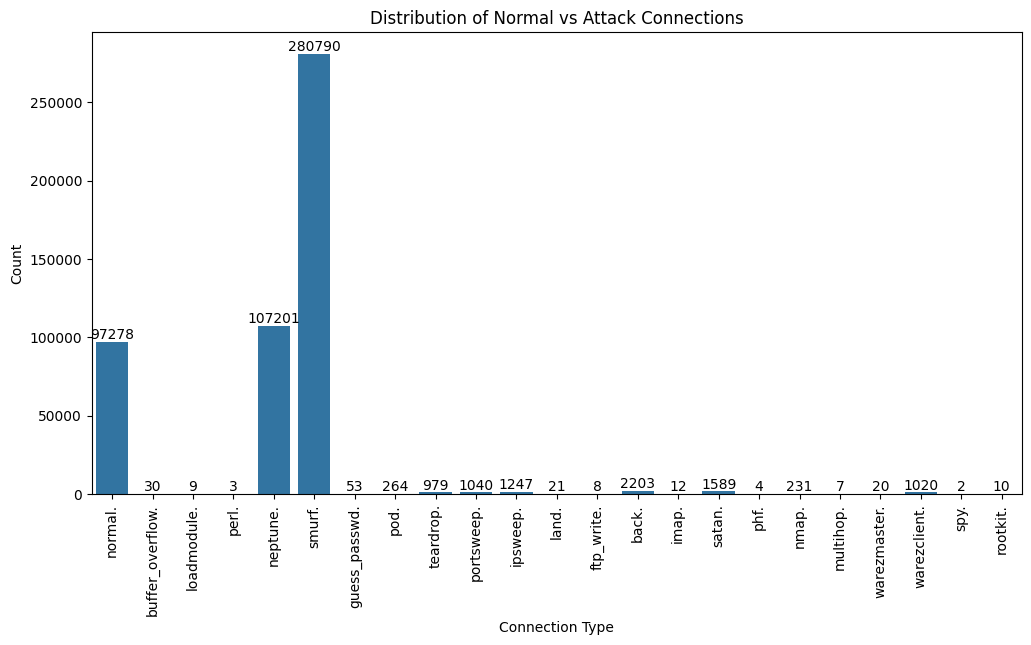

In [32]:
#Class Distribution

plt.figure(figsize=(12, 6))
ax = sns.countplot(x=y)
plt.title("Distribution of Normal vs Attack Connections")
plt.xlabel("Connection Type")
plt.ylabel("Count")
plt.xticks(rotation=90)


ax.bar_label(ax.containers[0])

plt.show()

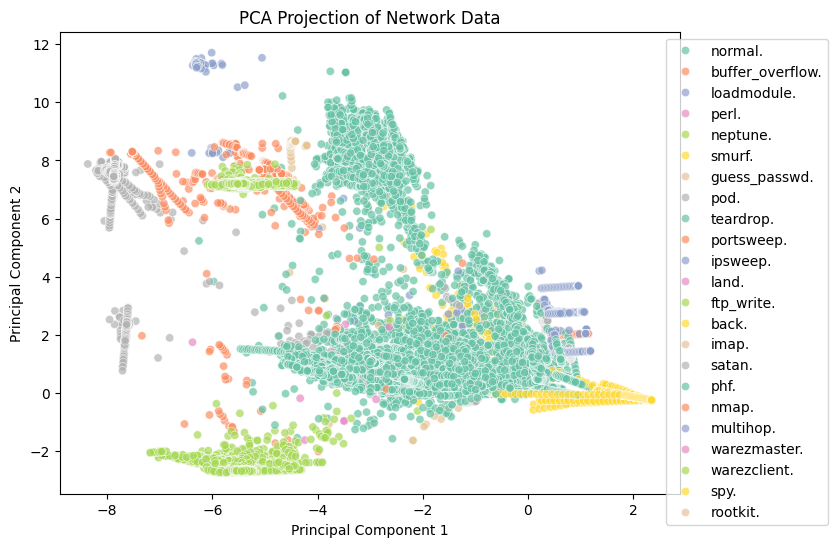

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set2", alpha=0.7)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title("PCA Projection of Network Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

In [34]:
df['label'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [35]:
X_final = X_pca

y_final = y.apply(lambda x: 0 if x == 'normal.' else 1)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)


In [36]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Results:
[[19190   163]
 [  326 79126]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     19353
           1       1.00      1.00      1.00     79452

    accuracy                           1.00     98805
   macro avg       0.99      0.99      0.99     98805
weighted avg       1.00      1.00      1.00     98805

Accuracy: 0.9951


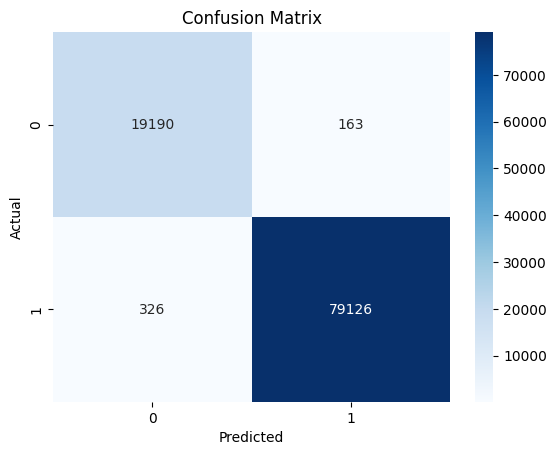

In [37]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [38]:
input_shape = (X_train.shape[1],)
model = Sequential([
    Input(shape=input_shape),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/10
2471/2471 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9656 - loss: 0.0851 - val_accuracy: 0.9896 - val_loss: 0.0374
Epoch 2/10
2471/2471 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9898 - loss: 0.0369 - val_accuracy: 0.9896 - val_loss: 0.0346
Epoch 3/10
2471/2471 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 0.0350 - val_accuracy: 0.9897 - val_loss: 0.0316
Epoch 4/10
2471/2471 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9895 - loss: 0.0322 - val_accuracy: 0.9896 - val_loss: 0.0313
Epoch 5/10
2471/2471 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9900 - loss: 0.0293 - val_accuracy: 0.9897 - val_loss: 0.0269
Epoch 6/10
2471/2471 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9897 - loss: 0.0283 - val_accuracy: 0.9898 - val_loss: 0.0262
Epoch 7/10
2471/2471 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9904 - loss: 0.0278 - val_accuracy: 0.9898 - val_loss: 0.0256
Epoch 8/10
2471/2471 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9905 - loss: 0.026

In [40]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9919 - loss: 0.0216
Test Accuracy: 0.9918


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred_dl = (model.predict(X_test) > 0.5).astype("int32")

# Report
print(confusion_matrix(y_test, y_pred_dl))
print(classification_report(y_test, y_pred_dl))


3088/3088 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
[[19300    53]
 [  754 78698]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19353
           1       1.00      0.99      0.99     79452

    accuracy                           0.99     98805
   macro avg       0.98      0.99      0.99     98805
weighted avg       0.99      0.99      0.99     98805



 True Negatives (TN) - 19284 Normal connections correctly classified as normal.

 False Positives (FP) - 69  Normal connections mistakenly classified as attacks.

False Negatives (FN) - 763  Attack connections mistakenly classified as normal.

True Positives (TP) - 78689 Attack connections correctly classified as attacks.

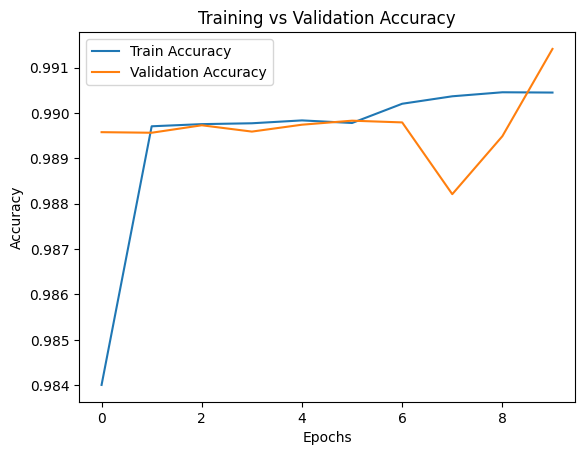

In [42]:


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


In [43]:

model.save("intrusion_detection_model.keras")
print("Model saved successfully.")


Model saved successfully.


In [44]:

unknown_sample = [[0, 1, 20, 9, 250, 1000, 0, 0, 0, 0,
                   0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 1, 1, 0.1, 0.01, 0.0, 0.0, 1.0, 0.0,
                   0.0, 10, 1, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]]


unknown_sample_df = pd.DataFrame(unknown_sample, columns=X.columns)

unknown_sample_scaled = scaler.transform(unknown_sample_df)


unknown_sample_pca = pca.transform(unknown_sample_scaled)
prediction = model.predict(unknown_sample_pca)
if prediction[0][0] > 0.5:
    print(f"🔐 Prediction: Attack Detected, Probability: {prediction[0][0]:.4f}")
else:
    print(f"✅ Prediction: Normal Connection, Probability: {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
✅ Prediction: Normal Connection, Probability: 0.0746


In [45]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("DNN Accuracy:", accuracy_score(y_test, y_pred_dl))


Random Forest Accuracy: 0.9950508577501138
DNN Accuracy: 0.9918323971458934
